In [1]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
from statsmodels.tools.eval_measures import rmse 
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
MT_df=pd.read_csv('../Data/Miles_Traveled.csv')
MT_df.head()

,DATE,TRFVOLUSM227NFWA
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [3]:
MT_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
DATE                588 non-null object
TRFVOLUSM227NFWA    588 non-null float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


In [4]:
MT_df.columns = ['ds','y']
MT_df['ds'] = pd.to_datetime(MT_df['ds'])
MT_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
ds    588 non-null datetime64[ns]
y     588 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.3 KB


In [5]:
MT_df.head()

,ds,y
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


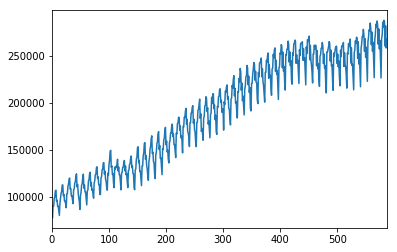

In [6]:
MT_df['y'].plot()

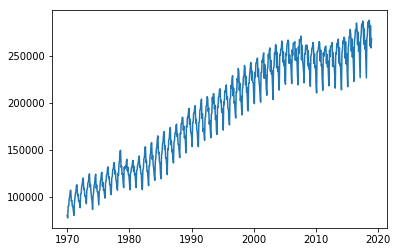

In [7]:
plt.plot(MT_df['ds'], MT_df['y']);

In [8]:
train, test = MT_df.iloc[:-12], MT_df.iloc[-12:]
MT_df.shape, train.shape, test.shape

((588, 2), (576, 2), (12, 2))

In [9]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=12, freq='MS')
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [10]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
583,2018-08-01,263410.800604,274003.061514,285857.128909,263349.068947,263449.516720,16448.013049,16448.013049,16448.013049,16448.013049,16448.013049,16448.013049,0.0,0.0,0.0,279858.813654
584,2018-09-01,263552.915940,255837.157619,266955.015061,263445.962146,263624.577961,-1670.418537,-1670.418537,-1670.418537,-1670.418537,-1670.418537,-1670.418537,0.0,0.0,0.0,261882.497404
585,2018-10-01,263690.446911,263001.812459,275342.448591,263539.068698,263798.588536,5305.505873,5305.505873,5305.505873,5305.505873,5305.505873,5305.505873,0.0,0.0,0.0,268995.952784
586,2018-11-01,263832.562247,250026.174593,261331.344863,263639.846051,263979.348530,-8208.986942,-8208.986942,-8208.986942,-8208.986942,-8208.986942,-8208.986942,0.0,0.0,0.0,255623.575305
587,2018-12-01,263970.093217,251881.185997,262588.817273,263717.313133,264164.787271,-6922.716937,-6922.716937,-6922.716937,-6922.716937,-6922.716937,-6922.716937,0.0,0.0,0.0,257047.376280


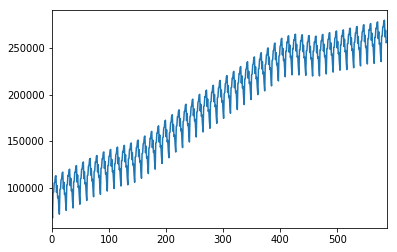

In [11]:
forecast['yhat'].plot()

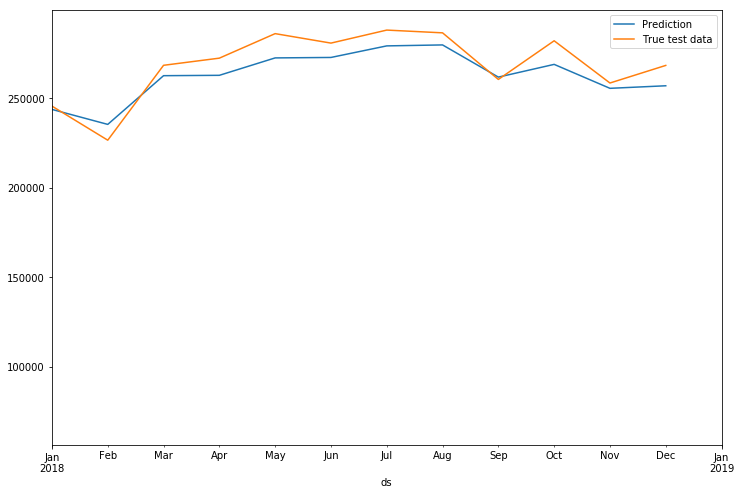

In [12]:
ax = forecast.plot(x='ds', y='yhat', label='Prediction', legend=True, figsize=(12,8));
test.plot(x='ds',y='y', label='True test data', legend=True, ax=ax, xlim=('2018-01-01','2019-01-01'));

In [13]:
rmse(test['y'],forecast.iloc[-12:]['yhat'])

8618.78315555941

In [14]:
test['y'].mean()

268739.6666666667

In [15]:
forecast.iloc[-12:]['yhat'].mean()

262758.56232914835

In [16]:
#Initial
initial =  5 * 365
initial = str(initial) + ' days'
initial

'1825 days'

In [17]:
#period
period =  5 * 365
period = str(period) + ' days'
period 

'1825 days'

In [18]:
#Horizon
horizon =  365 * 1
horizon = str(horizon) + ' days'
horizon 

'365 days'

In [19]:
df_cv =  cross_validation(m, initial=initial, period=period, horizon=horizon)

INFO:fbprophet:Making 9 forecasts with cutoffs between 1976-12-11 00:00:00 and 2016-12-01 00:00:00


In [20]:
len(df_cv)

108

In [21]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,coverage
0,52 days,2.402227e+07,4901.251892,4506.384371,0.027631,0.4
1,53 days,2.150811e+07,4637.683407,4238.662732,0.024863,0.4
2,54 days,1.807689e+07,4251.692535,3708.943275,0.019933,0.5
3,55 days,2.298205e+07,4793.960154,4236.275244,0.023042,0.4
4,57 days,2.078937e+07,4559.535784,3972.087270,0.021317,0.5
5,58 days,2.306545e+07,4802.649969,4248.916338,0.022521,0.4
6,59 days,3.794246e+07,6159.745363,5069.232548,0.026221,0.4
7,60 days,3.875108e+07,6225.036249,5136.940670,0.026702,0.4
8,62 days,3.722136e+07,6100.930821,4941.278113,0.025845,0.4
9,80 days,3.260728e+07,5710.278221,4353.547479,0.023861,0.5


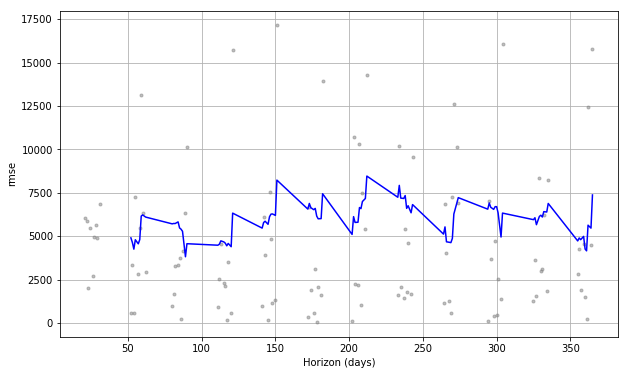

In [22]:
plot_cross_validation_metric(df_cv, metric='rmse');

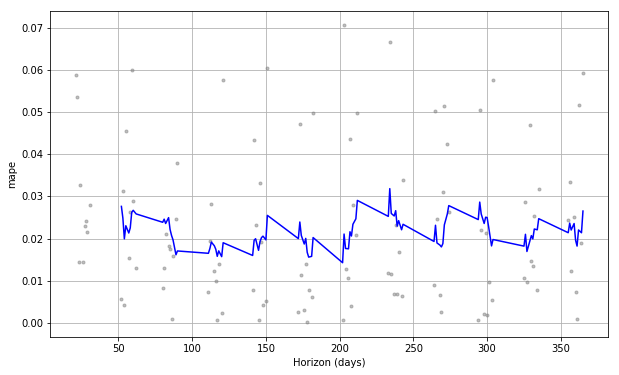

In [23]:
plot_cross_validation_metric(df_cv, metric='mape');